### **Data Collection and Preparation:**

In [2]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('DIA_trainingset_RDKit_descriptors.csv') # load dataset

#instances = data.iloc[:-1, 1:] # get instances
#labels = data.iloc[:-1, 1] # get labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # Target labels

# Include only continuous and numerical features
instances = X.select_dtypes(include=[np.number]) # select only numerical features
#instances = instances.dropna(axis=1, how='any') # drop columns with NaN values
#instances = instances.drop(columns=['ID']) # drop ID column

#instances = instances.drop(columns=['SMILES']) # drop SMILES column

### **Principal Component Analysis (PCA):**

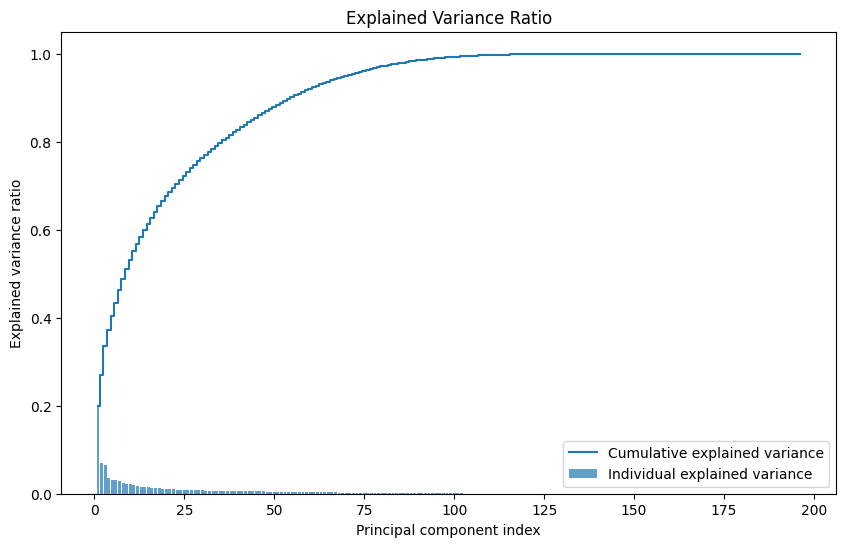

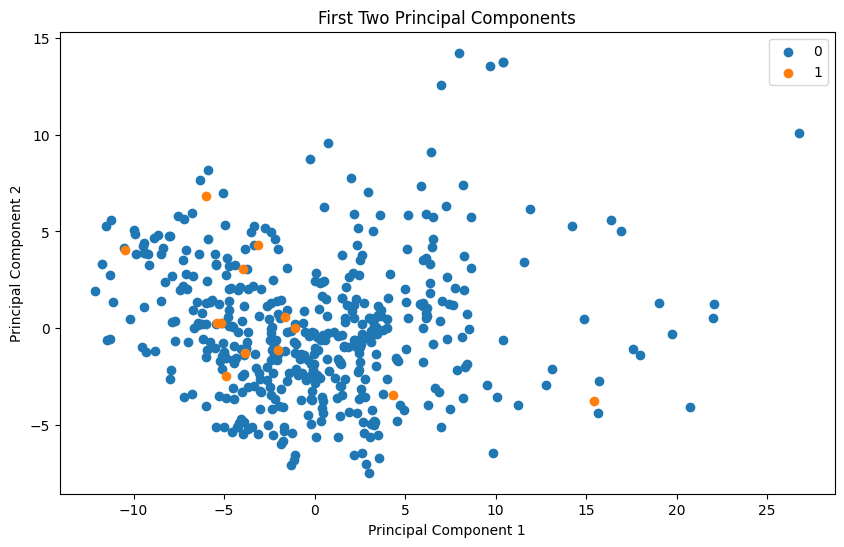

Explained variance ratio of the first two components:
Explained variance by PC1: 0.2003
Explained variance by PC2: 0.0698
Cumulative explained variance of the first two components: 0.2701


In [ ]:
from sklearn.preprocessing import StandardScaler  # Standardize the data
from sklearn.decomposition import PCA # PCA module

# ---------------- PCA PREPARATION ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(instances)


# --------------- PCA IMPLEMENTATION ---------------------------
pca = PCA() # Create a PCA object
# Fit PCA to the scaled data
pca.fit(X_scaled)
# Transform the data to the principal components
X_pca = pca.transform(X_scaled)


# ---------------- PCA VISUALIZATION ---------------------------
# This shows how much variance each principal component explains
explained_variance = pca.explained_variance_ratio_

# Visualize Explained Variance Ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio')
plt.show()

# Visualize the First Two Principal Components with color
plt.figure(figsize=(10, 6))
# Use different colors for each label
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components')
plt.legend()  # Show legend to identify colors
plt.show()

# Comment on Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.sum(explained_variance[:2])

print("Explained variance ratio of the first two components:")
print(f"Explained variance by PC1: {explained_variance[0]:.4f}")
print(f"Explained variance by PC2: {explained_variance[1]:.4f}")
print(f"Cumulative explained variance of the first two components: {cumulative_variance:.4f}")
#print("Explained variance ratio:", explained_variance)  # (explained_variance): variable contains the variance explained by each principal component.
#print("Cumulative explained variance of first 2 PCs:", np.sum(explained_variance[:2]))

In [ ]:
# Apply PCA to the dataset
from sklearn.preprocessing import StandardScaler  # Standardize the data
from sklearn.decomposition import PCA # PCA module

# Standrize: its important to standrize the data before implementing PCA 
scaler = StandardScaler() # create a StandardScaler object
scaler.fit(instances) # fit the scaler to the data
instances = scaler.transform(instances) # transform the data

# Perform PCA
no_components = 2 # number of components to keep
pca = PCA(n_components= no_components) # reduce to 2 dimensions
pca_result = pca.fit_transform(instances) # fit and transform the data

# Create a DataFrame with PCA results and labels
columns = ['PC' + str(i+1) for i in range(no_components)] # create column names for PCA components
pca_df = pd.DataFrame(data=pca_result, columns=columns) # create DataFrame with PCA results
pca_df['Label'] = labels # add labels to DataFrame

# Ensure labels are numeric for visualization
if not np.issubdtype(pca_df['Label'].dtype, np.number):
    print("Warning: Labels are non-numeric. Encoding labels for visualization.")
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    pca_df['Label'] = le.fit_transform(pca_df['Label'])

# PLOTING: print the obtained PCA components and explained variance
print("PCA Components:")
# Dcending order of explained variance
print("Number of components:")
print(pca.n_components_) # print number of components
print("PCA Components:")
print(pca.components_) # print PCA components
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_) # print explained variance ratio
print("Explained Variance:")
print(pca.explained_variance_) # print explained variance
print("Mean:")
print(pca.mean_) # print mean of the data

# VISUALIZATION: Visualize reduced data
plt.figure(figsize=(8, 6)) # set figure size
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Label'], cmap='viridis', alpha=0.5) # scatter plot
plt.title('PCA of RDKit Descriptors') # set title
plt.xlabel('Principal Component 1') # set x-axis label
plt.ylabel('Principal Component 2') # set y-axis label
plt.colorbar(label='Label') # add color bar
plt.grid(True) # add grid
plt.show() # show plot


### **Classical Manifold (LLE):**

**Why LLE Might Be Suitable for This Dataset:**
- Potential for Non-linear Relationships: Drug-induced autoimmunity is a complex biological phenomenon. It's plausible that the relationships between the molecular descriptors (features) and the propensity for a drug to induce autoimmunity are non-linear.

- Local Structure Preservation: LLE excels at preserving the local neighborhood structure of the data. In the context of drug molecules, this means that drugs with similar molecular properties (close neighbors in the high-dimensional space) are likely to remain close to each other in the lower-dimensional embedding.

- Manifold Assumption: Manifold learning methods like LLE assume that the high-dimensional data lies on a lower-dimensional manifold embedded in the high-dimensional space. It's conceivable that the molecular descriptors, while numerous 

**Comparison of LLE and Isomap**
Both LLE and Isomap are classical manifold learning methods, but they differ in their approach to dimensionality reduction:
- **LLE (Locally Linear Embedding):** LLE focuses on preserving local relationships. It constructs each data point as a linear combination of its neighbors and then seeks a low-dimensional embedding that preserves these local weights. LLE is sensitive to the choice of the number of neighbors (n_neighbors)
- **Isomap (Isometric Mapping):** Isomap aims to preserve global geodesic distances between all pairs of points. It constructs a neighborhood graph and then estimates geodesic distances (distances along the manifold) using shortest path algorithms on this graph. somap is also sensitive to the neighborhood parameter but it is better at preserving the global structure of the manifold.

**In practice, it's often beneficial to try both LLE and Isomap (and potentially other manifold learning methods) and compare their results to gain a more comprehensive understanding of the data.**

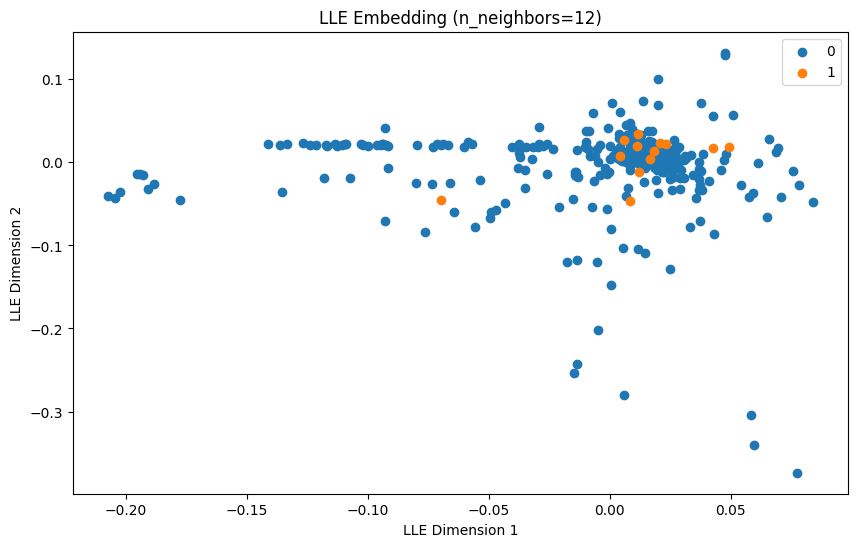

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Data Preparation 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(instances)

#  ----------------- Apply LLE ----------------------------
n_neighbors = 12  # Choose the number of neighbors
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2, method='standard')
X_lle = lle.fit_transform(X_scaled)

# -------------- Visualize LLE embedding -------------------
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_lle[y == label, 0], X_lle[y == label, 1], label=label)
plt.xlabel('LLE Dimension 1')
plt.ylabel('LLE Dimension 2')
plt.title(f'LLE Embedding (n_neighbors={n_neighbors})')
plt.legend()
plt.show()


### **Modern Manifold (t-SNE):**

- **Reasoning to Use (t-SNE):** 
    - `Emphasis on Non-linear Structure:` t-SNE is designed to uncover non-linear relationships in data and is particularly good at revealing well-defined clusters. In the context of drug molecular data, it's plausible that drugs with similar mechanisms of action or similar effects on the immune system (including autoimmunity) form distinct.
    - `Local Structure Preservation:` While t-SNE doesn't perfectly preserve global distances, it excels at preserving local neighborhoods. This is crucial for the Drug-induced Autoimmunity Prediction dataset because drugs with very similar molecular properties are likely to have similar biological activities.  
- **Visualization:** We create a scatter plot of the t-SNE embedding, coloring the points based on the labels.

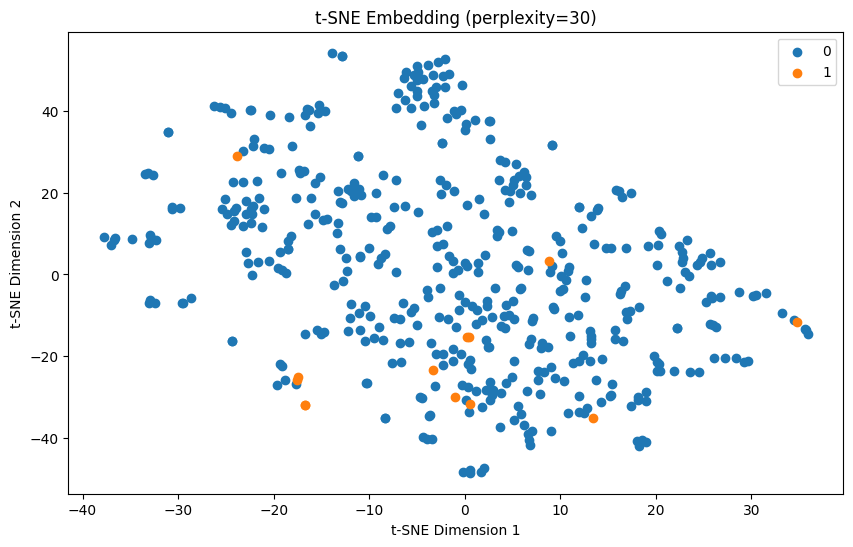

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns # For potentially better-looking plots

# Preprocess the Data: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(instances)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=15, random_state=42) # Key parameters
X_tsne = tsne.fit_transform(X_scaled)


# Visualize t-SNE embedding
plt.figure(figsize=(10, 6))
for label in np.unique(y):
    plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title(f't-SNE Embedding (perplexity=30)')
plt.legend()
plt.show()

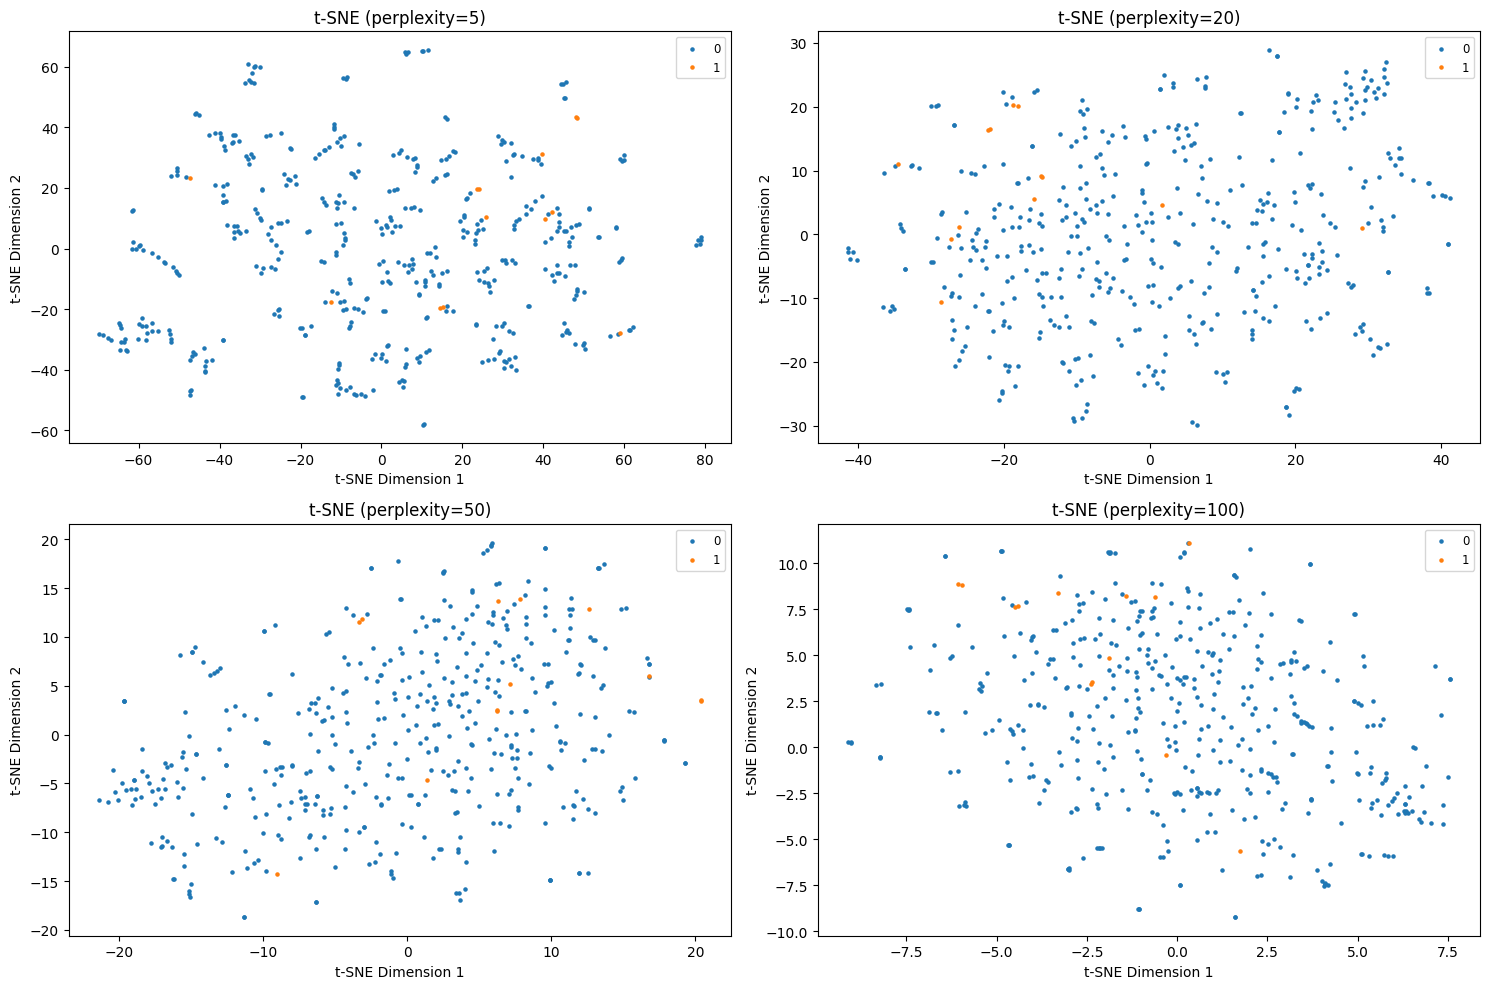

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess: Standardize the features of dataset 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(instances)

# Parameter Configuration: Apply t-SNE with different parameter configurations
perplexities = [5, 20, 50, 100]  # Different perplexity values
n_components = 2  # Number of dimensions for embedding
random_state = 42  # For reproducibility

plt.figure(figsize=(15, 10))  # Create a larger figure for subplots

# Loop through different perplexity values and create subplots 
for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, random_state=random_state)
    X_tsne = tsne.fit_transform(X_scaled)

    # Create subplots
    plt.subplot(2, 2, i + 1)  # 2 rows, 2 columns, plot position
    for label in np.unique(y):
        plt.scatter(X_tsne[y == label, 0], X_tsne[y == label, 1], label=label, s=5)  # Smaller points
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE (perplexity={perplexity})')
    plt.legend(fontsize='small')  # Smaller legend font
    plt.tight_layout()  # Adjust layout to prevent overlapping

- **Perplexity = 5 (Top Left):** We see many small, tight clusters of blue points (class '0'). The orange points (class '1') appear scattered and interspersed within and around these small blue clusters. The overall structure looks somewhat fragmented, with many isolated groups of points.

- **Perplexity = 20 (Top Right):** The clusters of blue points become more cohesive and less fragmented compared to the perplexity=5 plot. The orange points still appear somewhat dispersed but show a slight tendency to be located at the edges or in between the more prominent blue clusters. A more global structure starts to emerge compared to the very local focus of the previous plot.

- **Perplexity = 50 (Bottom Left):** The blue points form even larger, more consolidated clusters. The orange points are still distributed among the blue points, but there might be a slightly clearer separation trend in some regions compared to the lower perplexities. The global arrangement of the clusters becomes more apparent.

- **:** The blue points now form a few very broad clusters. The orange points are even more integrated within these large blue clusters, with less clear separation. The global structure is further emphasized, potentially at the cost of losing finer local details.

**The choice of perplexity significantly influences the t-SNE visualization:**
    `- A low perplexity` focuses on local details, potentially leading to fragmented clusters.
    `- A high perplexity` emphasizes global structure, which can smooth out local variations and might obscure finer class distinctions